In [1]:
'''
Analysis for "Technical considerations of MSK femoral cartilage segmentation using CNNs"

@author: Arjun Desai, arjundd@stanford.edu
'''

import sys
sys.path.insert(0, '../')

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

import os
import numpy as np
import scipy.io as sio

import seaborn as sns

import utils
from analysis import analysis_funcs as af

/home/arjundd/anaconda3/envs/tf_36/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# Base unet - best performing network
BASE_UNET = '/bmrNAS/people/arjun/msk_seg_networks/oai_data/unet_2d/original_akshaysc/test_results'

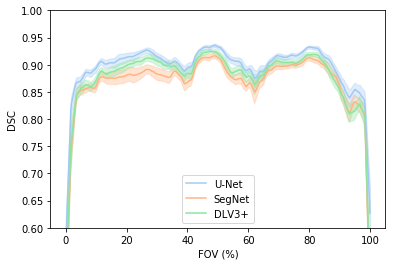

In [3]:
# Architecture result paths
ARCH_UNET = BASE_UNET
ARCH_SEGNET = '/bmrNAS/people/arjun/msk_seg_networks/oai_data/segnet_2d/2018-09-01-22-39-39/fine_tune/test_results'
ARCH_DEEPLAB = '/bmrNAS/people/arjun/msk_seg_networks/oai_data/deeplabv3_2d/2018-09-26-19-07-53/fine_tune/test_results/16_2-4-6'
ARCHS = {'filename': 'architecture.png',
         'keys': ['U-Net', 'SegNet', 'DLV3+'],
         'U-Net': ARCH_UNET, 'SegNet': ARCH_SEGNET, 'DLV3+': ARCH_DEEPLAB}
af.graph_slice_exp(ARCHS, True)

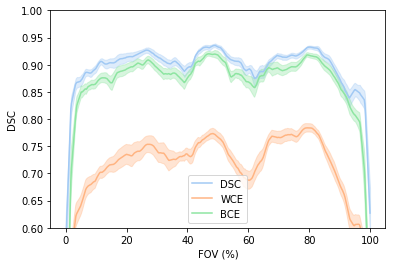

In [4]:
# Loss function result paths
LOSS_DSC = BASE_UNET
LOSS_WCE = '/bmrNAS/people/arjun/msk_seg_networks/loss_limit/unet_2d/2018-10-21-00-49-34/test_results'
LOSS_BCE = '/bmrNAS/people/arjun/msk_seg_networks/loss_limit/unet_2d/2018-10-21-15-54-44/test_results'

LOSSES = {'filename': 'losses.png',
          'keys': ['DSC', 'WCE', 'BCE'],
          'DSC': LOSS_DSC, 'WCE': LOSS_WCE, 'BCE': LOSS_BCE}
af.graph_slice_exp(LOSSES, True)

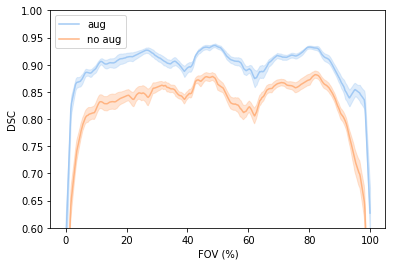

In [5]:
# Augmentation results
# Augmentation result paths
AUG_BASE_PATH = '/bmrNAS/people/arjun/msk_seg_networks/augment_limited/unet_2d/%s/test_results'
AUG_YES = BASE_UNET
AUG_NO = [AUG_BASE_PATH % '2018-10-05-04-17-05', AUG_BASE_PATH % '2018-10-05-16-52-29', AUG_BASE_PATH % '2018-10-07-00-27-34']

AUGS = {'filename': 'augment.png',
        'keys': ['aug', 'no aug'],
        'aug': AUG_YES, 'no aug': AUG_NO}

af.graph_slice_exp(AUGS)

In [6]:
# TODO: inspect training/testing

# VOLUME_2D = BASE_UNET
# VOLUME_2_5D_3 = '/bmrNAS/people/arjun/msk_seg_networks/volume_limited/unet_2_5d/2018-10-14-17-11-54/test_results' # 2.5D network with 3 slices (+/-1)
# VOLUME_2_5D_5 = '/bmrNAS/people/arjun/msk_seg_networks/volume_limited/unet_2_5d/2018-10-21-02-31-40/test_results' # 2.5D network with 5 slices (+/-2)

# LOSSES = {'filename': 'volumes.png',
#           'keys': ['2D', '2.5D-3', '2.5D-5'],
#           '2D': VOLUME_2D, '2.5D-3': VOLUME_2_5D_3, '2.5D-5': VOLUME_2_5D_5}
# af.graph_slice_exp(LOSSES, True)

        DSC          
r2, r - U-Net : 0.7454, 0.8634
r2, r - SegNet : 0.9483, 0.9738
r2, r - DLV3+ : 0.9678, 0.9837
        VOE          
r2, r - U-Net : 0.7472, 0.8644
r2, r - SegNet : 0.9791, 0.9895
r2, r - DLV3+ : 0.9793, 0.9896
        CV          
r2, r - U-Net : 0.3731, 0.6108
r2, r - SegNet : 0.8497, 0.9218
r2, r - DLV3+ : 0.8201, 0.9056


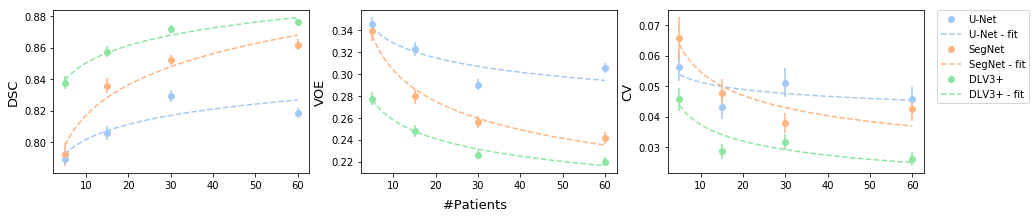

In [7]:
# Data limitation graphs
# Each architecture was run with multiple seeds

unet_data_limitation_path = '/bmrNAS/people/arjun/msk_seg_networks/data_limit/%03d/unet_2d/%s/test_results'
segnet_data_limitation_path = '/bmrNAS/people/arjun/msk_seg_networks/data_limit/%03d/segnet_2d/%s/test_results'
deeplab_data_limitation_path = '/bmrNAS/people/arjun/msk_seg_networks/data_limit/%03d/deeplabv3_2d/%s/test_results/16_2-4-6'

dl_unet = [ # Seed 1
            [unet_data_limitation_path % (5, '2018-10-07-18-27-21'), 
             unet_data_limitation_path % (15, '2018-10-07-22-44-24'), 
             unet_data_limitation_path % (30, '2018-10-08-05-08-59'),
             unet_data_limitation_path % (60, '2018-10-08-12-01-38')],

            # Seed 2
            [unet_data_limitation_path % (5, '2018-10-03-17-55-27'), 
             unet_data_limitation_path % (15, '2018-10-03-22-00-17'), 
             unet_data_limitation_path % (30, '2018-10-04-02-57-29'),
             unet_data_limitation_path % (60, '2018-10-04-07-55-55')],

            # Seed 3
            [unet_data_limitation_path % (5, '2018-10-04-18-27-40'), 
             unet_data_limitation_path % (15, '2018-10-04-23-12-14'), 
             unet_data_limitation_path % (30, '2018-10-05-04-41-17'),
             unet_data_limitation_path % (60, '2018-10-05-11-08-06')]
           ]

dl_segnet = [   # Seed 1
                [segnet_data_limitation_path % (5, '2018-10-04-07-34-20'), 
                 segnet_data_limitation_path % (15, '2018-10-04-15-12-54'), 
                 segnet_data_limitation_path % (30, '2018-10-04-21-31-03'),
                 segnet_data_limitation_path % (60, '2018-10-05-04-00-47')],

                # Seed 2
                [segnet_data_limitation_path % (5, '2018-10-11-19-23-53'), 
                 segnet_data_limitation_path % (15, '2018-10-12-03-04-00'), 
                 segnet_data_limitation_path % (30, '2018-10-12-09-45-22'),
                 segnet_data_limitation_path % (60, '2018-10-12-16-02-42')],

                # Seed 3
                [segnet_data_limitation_path % (5, '2018-10-05-16-08-09'), 
                 segnet_data_limitation_path % (15, '2018-10-06-00-07-38'), 
                 segnet_data_limitation_path % (30, '2018-10-26-06-21-11'),
                 segnet_data_limitation_path % (60, '2018-10-26-06-16-12')]
            ]


dl_deeplab = [  # Seed 1
                [deeplab_data_limitation_path % (5, '2018-10-02-23-21-01'), 
                 deeplab_data_limitation_path % (15, '2018-10-03-07-10-34'), 
                 deeplab_data_limitation_path % (30, '2018-10-03-14-11-30'),
                 deeplab_data_limitation_path % (60, '2018-10-03-20-35-06')],

                # Seed 2
                [deeplab_data_limitation_path % (5, '2018-10-11-19-25-15'), 
                 deeplab_data_limitation_path % (15, '2018-10-12-03-08-29'), 
                 deeplab_data_limitation_path % (30, '2018-10-12-10-24-21'),
                 deeplab_data_limitation_path % (60, '2018-10-12-16-56-59')],

                # Seed 3
                [deeplab_data_limitation_path % (5, '2018-10-07-17-36-29'), 
                 deeplab_data_limitation_path % (15, '2018-10-08-01-27-49'), 
                 deeplab_data_limitation_path % (30, '2018-10-08-08-39-38'),
                 deeplab_data_limitation_path % (60, '2018-10-08-15-33-20')]
              ]

data = {'filename': 'data_limitation.png', 'keys': ['U-Net', 'SegNet', 'DLV3+'], 
        'U-Net': dl_unet, 'SegNet': dl_segnet, 'DLV3+': dl_deeplab}

ov_data = {'dsc': data,
          'voe': data,
          'cvs': data}
af.graph_data_limitation(ov_data, 'data_limitation.png')